In [1]:
import numpy as np
import os
import matplotlib
from pyevtk.hl import gridToVTK
import tables
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import glob
import pandas as pd

In [2]:
file = '/Users/eframe/dmi/reconstructions/phantom_comp/phantom_comp.h5'
f = tables.open_file(file, 'r')
src = f.root.image.read()

f.close()
binsize = 1
X, Y, Z = np.mgrid[ -25:26:binsize, -16:17:binsize, -25:26:binsize ] 
sourcePixels = np.array( [ X.flatten(), Y.flatten(), Z.flatten() ] ).T + np.array([0,0,60])
data = src.copy()
data = data.copy().reshape(X.shape)
data = data.copy() 
data = np.fliplr( data )
data_ci = data[3:-3,:,3:-3]

In [100]:
file = '/Users/eframe/dmi/reconstructions/phantom_coded/phantom_coded.h5'
f = tables.open_file(file, 'r') 
src = f.root.image.read() * factor

f.close()
binsize = 1
sourceX, sourceY, sourceZ = np.mgrid[ -23:24:binsize, -20:21:binsize, -23:24:binsize ]
sourcePixels = np.array( [ sourceX.flatten(), sourceY.flatten(), sourceZ.flatten() ] ).T
data = src.reshape( sourceX.shape ) 
data = data.copy()
data = data.copy()
data = np.pad(data, 3)
data_ca = data[5:-7,3:-3,6:-6]

In [4]:
file = '/Users/eframe/dmi/reconstructions/micro_coded/micro_coded_quant.h5'
f = tables.open_file(file, 'r')
src = f.root.image.read() 
f.close()

binsize = 1
sourceX, sourceY, sourceZ = np.mgrid[ -19:20:binsize, 9:48:binsize, -19:20:binsize ]
sourcePixels = np.array( [ sourceX.flatten(), sourceY.flatten(), sourceZ.flatten() ] ).T
data = src.reshape( sourceX.shape ) 
data = data.copy()
data_micro_ca = data[:,:,:]

In [5]:
# data_ca.astype(np.float32).tofile('/Users/eframe/dmi/data/phantom_coded.bin')
# data_ci.astype(np.float32).tofile('/Users/eframe/dmi/data/phantom_compton.bin')

16


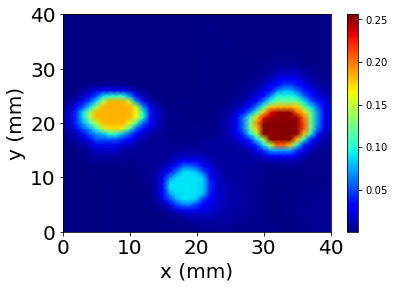

In [101]:
#Display Image 
%matplotlib inline
data2 = data_ca.max(1)
a, b = min( data2.flatten() ), max( data2.flatten() )
for i in np.arange( 16, 17 ):
    fig, ax = plt.subplots()
    grid = data2
    im = ax.pcolormesh(  grid.T, vmin=a, vmax=b, cmap='jet', shading='gouraud') 
    ax.set_xlabel( 'x (mm)', fontsize = 20 )
    ax.set_ylabel( 'y (mm)', fontsize = 20 )
    ax.tick_params( labelsize = 20 )
    cbar = plt.colorbar( im )
    print(i)
    plt.show()

In [102]:
# # Display Image 
# %matplotlib inline
# depth = sourcePixels[:sourceX.shape[2],2]
# a, b = min( data.flatten() ), max( data.flatten() )
# for i in np.arange( data.shape[2] ):
#     fig, ax = plt.subplots()
#     grid = data[:,:,i]
#     im = ax.pcolormesh(  grid.T, vmin=b, vmax=a, cmap='jet', shading='gouraud') 
#     ax.set_xlabel( 'x (mm)', fontsize = 20 )
#     ax.set_ylabel( 'y (mm)', fontsize = 20 )
#     ax.tick_params( labelsize = 20 )
#     cbar = plt.colorbar( im )
#     print(depth[i])
#     plt.show()

16


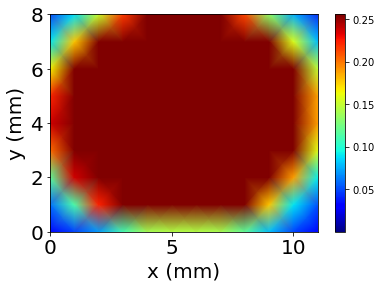

In [103]:
#Phanom Display Image 
%matplotlib inline

# coded phantom
big_ca = data_ca[27:39,27:38,15:27].sum(2)
med_ca = data_ca[2:14,28:37,16:27].sum(2)
small_ca = data_ca[15:23,29:36,5:13].sum(2)

# comp phantom
big_ci = data_ci[29:41,12:23,16:29].sum(1)
med_ci = data_ci[2:13,14:23,19:29].sum(2)
small_ci = data_ci[17:24,14:22,5:14].sum(1)

# # coded micro
# micro_ca = data_micro_ca[5:16, 18:28, 12:24].sum(1)

val = med_ca.copy()
scale = data_ca.copy()
a, b = min( scale.flatten() ), max( scale.flatten() )
for i in np.arange( 16, 17 ):
    fig, ax = plt.subplots()
    grid = val
    im = ax.pcolormesh(  grid.T, vmin=a, vmax=b, cmap='jet', shading='gouraud') 
    ax.set_xlabel( 'x (mm)', fontsize = 20 )
    ax.set_ylabel( 'y (mm)', fontsize = 20 )
    ax.tick_params( labelsize = 20 )
    cbar = plt.colorbar( im )
    print(i)
    plt.show()

In [104]:
total = np.sum(big_ca) + np.sum(med_ca) + np.sum(small_ca)
print(np.sum(big_ca)/total, np.sum(med_ca)/total, np.sum(small_ca)/total)
print(np.sum(big_ca), np.sum(med_ca), np.sum(small_ca))

0.61411906422212 0.28896615687294713 0.0969147789049328
119.29262822514684 56.131675972569994 18.8256958022832


In [99]:
factor = 5.25/total * 37

In [52]:
# Factors for Quantification Factor with Phantom and with Microsphere (CA)
t_218 = 30 * 60 * 8  # seconds
t_218_micro = 41 * 60 * 8 # seconds
t_440 = 30 * 60 * 8 # seconds

d = 2.5 # radius of phantom for attenuation (cm)
d_micro = 0.3

dead_218 = 0.05
dead_218_micro = 0
dead_440 = 0.43

u_218 = 0.1330 * 1 # cm-1
u_440 = 0.1021 * 1 # cm-1

r_218 = 95 + 50 # mm
r_218_micro = 95 + 90 # mm
r_440 = 53 # mm

A_218 = 5.25 * 37000 # Bq ( decay / sec )
A_218_micro = 0.18946457081379978 * 37000 # Bq ( decay / sec )
A_440 = 2.28 * 37000 # Bq ( decay / sec )

print(np.sum(big_ca) + np.sum(med_ca) + np.sum(small_ca), np.sum(big_ci) + np.sum(med_ci) + np.sum(small_ci) )

1819331354.86197 27779.32624007056


In [10]:
I_218 = 1.38E+10
I_218_micro = micro_ca.sum()
I_440 = 33499.06

In [11]:
f_ca = I_218 / ( np.exp( -u_218 * d ) * ( 1 / r_218 ** 2 ) * t_218 * A_218 * ( 1 - dead_218 ) * 0.97 )
f_ca_micro = I_218_micro / ( np.exp( -u_218 * d_micro ) * ( 1 / r_218_micro ** 2 ) * \
                            t_218_micro * A_218_micro * ( 1 - dead_218_micro ) * 0.97 )
f_ci = I_440 / ( np.exp( -u_440 * d ) * ( 1 / r_440 ** 2 ) * t_440 * A_440 * ( 1 - dead_440 ) * 0.88 )
print(f_ca, f_ca_micro, f_ci)

156963.6709025157 266780.566449859 0.19933402462820632


In [12]:
A_218 = I_218 / ( f_ca * np.exp( -u_218 * d ) * ( 1 / r_218 ** 2 ) * t_218 *  ( 1 - dead_218 ) * 0.97 )
A_218 / 37000

5.250000000000001

In [13]:
A_440 = I_440 / ( f_ci * np.exp( -u_440 * d ) * ( 1 / r_440 ** 2 ) * t_440 *  ( 1 - dead_440 ) * 0.88 )
A_440 / 37000

2.28

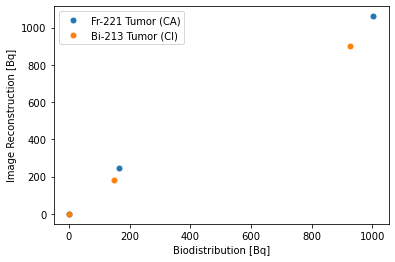

In [14]:
tumor_coded = [ 0, 1061, 249 ]
tumor_218 = [ 0, 1003, 164 ]
tumor_comp = [ 0, 901, 183 ]
tumor_440 = [ 0, 926, 150 ]
plt.plot(tumor_218, tumor_coded, '.', markersize=10, label='Fr-221 Tumor (CA)')
plt.plot(tumor_440, tumor_comp, '.', markersize=10, label='Bi-213 Tumor (CI)')
plt.xlabel('Biodistribution [Bq]')
plt.ylabel('Image Reconstruction [Bq]')
plt.legend()
plt.show()

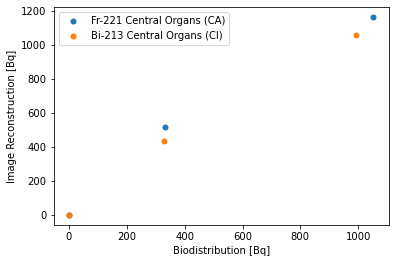

In [15]:
central_coded = [ 0, 1164, 520 ]
central_218 = [ 0, 1052, 331 ]
central_comp = [ 0, 1062, 436 ]
central_440 = [ 0, 993, 329 ]
plt.plot(central_218, central_coded, '.', markersize=10, label='Fr-221 Central Organs (CA)')
plt.plot(central_440, central_comp, '.', markersize=10, label='Bi-213 Central Organs (CI)')
plt.xlabel('Biodistribution [Bq]')
plt.ylabel('Image Reconstruction [Bq]')
plt.legend()
plt.show()